#### This is the predicting the price of the second hand car with the variables defined 
#### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the CSV File
df = pd.read_csv("../datasets-for-ML-main/Car details from CarDekho.csv")

#excluding the null data
df = df[df.torque.isnull() == False]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.info()  # Information of the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.7+ KB


In [4]:
#df.max_power[df.max_power.isna() == True]

#### Changing the alpha-numeric value into to numerics values

In [5]:
df.engine=df.engine.replace(to_replace=[' CC'], value='', regex=True).astype('float64')
df.max_power=df.max_power.replace(to_replace=['.[a-z]'], value='', regex=True).astype('float64')
df.mileage = df.mileage.str.split(" ", n = 1, expand = True)[0].astype('float64')

#validating whether it have modified accordingly or not
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
#Finding the correlation coefficient between the variables using pearson
pearson_corr=df.corr( method='pearson')#, min_periods=1)
pearson_corr

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.412302,-0.428548,0.328544,0.018263,0.226598,-0.007923
selling_price,0.412302,1.000000,-0.222158,-0.126280,0.455682,0.749674,0.041617
km_driven,-0.428548,-0.222158,1.000000,-0.172980,0.206031,-0.038159,0.227259
mileage,0.328544,-0.126280,-0.172980,1.000000,-0.576408,-0.374621,-0.451700
engine,0.018263,0.455682,0.206031,-0.576408,1.000000,0.703975,0.611103
max_power,0.226598,0.749674,-0.038159,-0.374621,0.703975,1.000000,0.191999
seats,-0.007923,0.041617,0.227259,-0.451700,0.611103,0.191999,1.000000


<AxesSubplot:>

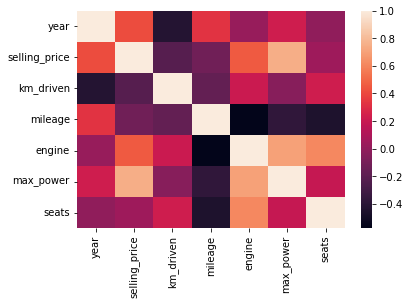

In [7]:
#corelation in the heatmap
sns.heatmap(pearson_corr)

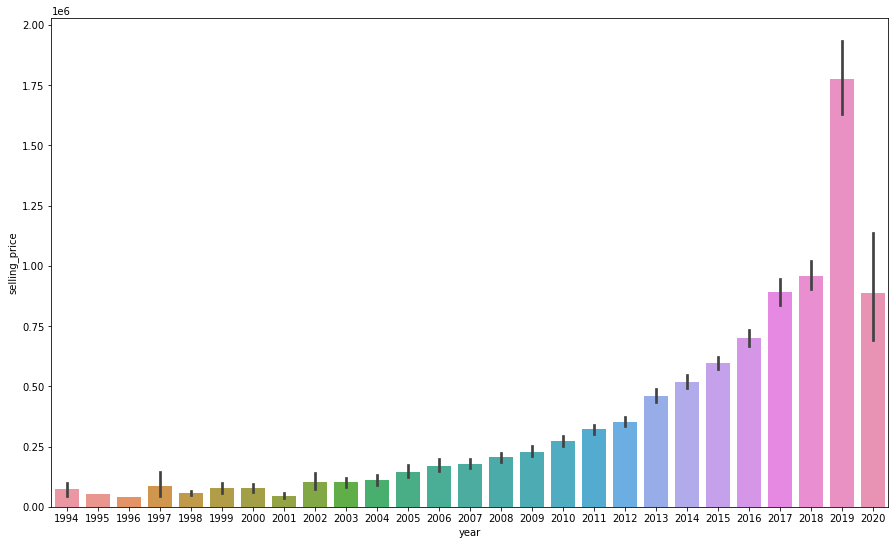

In [8]:
#Analyzing the selling price over the years in a barplot
fig, ax = plt.subplots(1,1,figsize=(15, 9))
sns.barplot(x="year", y="selling_price", data=df);

#### Checking the distribution of the data over the numerical features and also analyzing the scewness of the data (Right skew / Left Scew / Zero skew)

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'selling_price'}>,
        <AxesSubplot:title={'center':'km_driven'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'engine'}>,
        <AxesSubplot:title={'center':'max_power'}>],
       [<AxesSubplot:title={'center':'seats'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

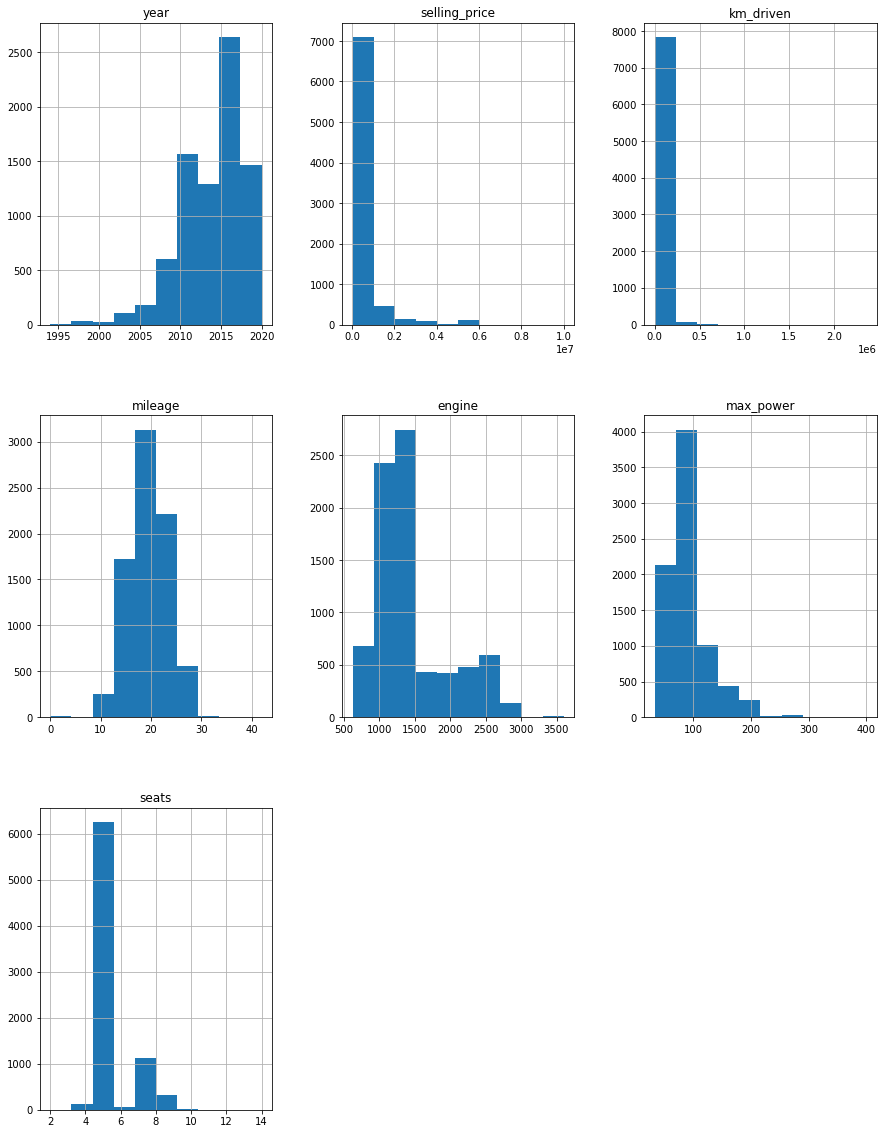

In [9]:
df.hist(figsize=(15,20))

#### To overcome Left & Right Skew , we will standardize the data using StandardScalar or normalize using MinMaxScalar

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'km_driven'}>],
       [<AxesSubplot:title={'center':'engine'}>,
        <AxesSubplot:title={'center':'max_power'}>],
       [<AxesSubplot:title={'center':'seats'}>,
        <AxesSubplot:title={'center':'max_power'}>]], dtype=object)

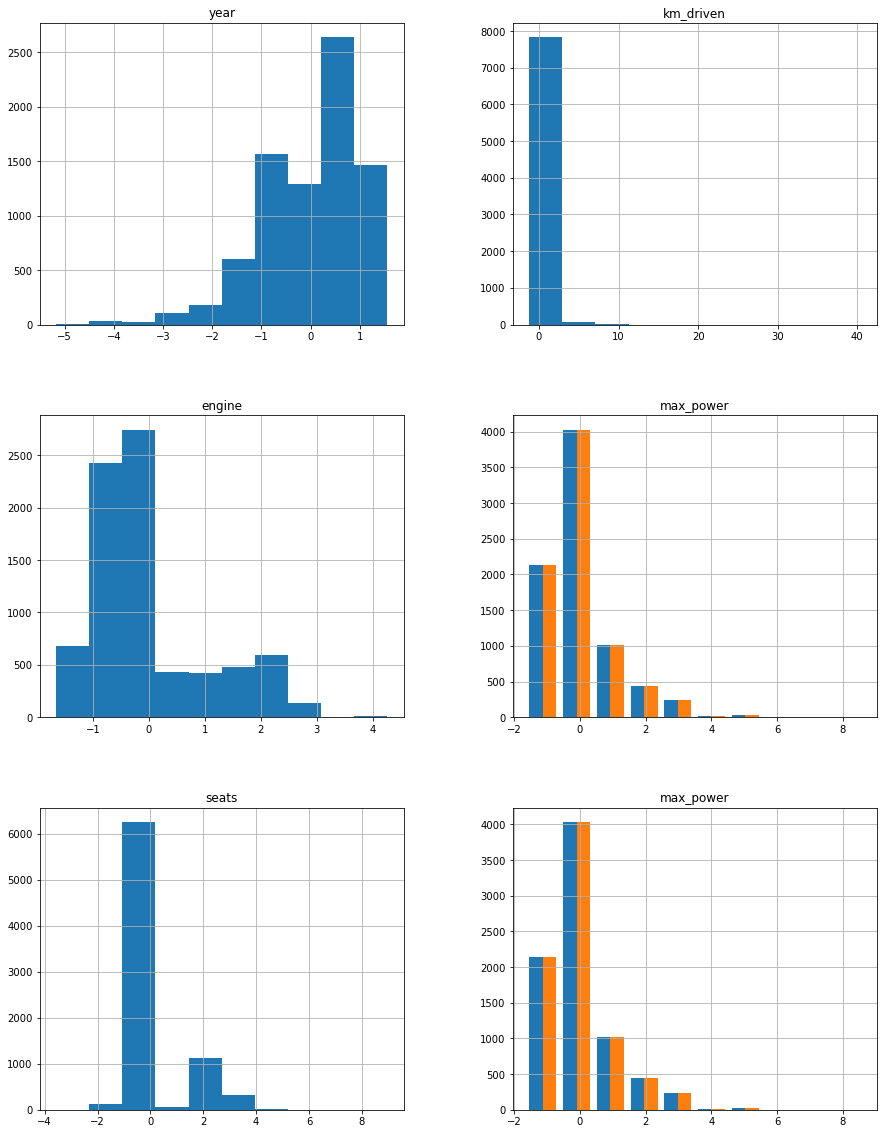

In [10]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std = StandardScaler()
standard_df = std.fit_transform(df[['year','km_driven','engine','max_power','seats','max_power']])
standard_df = pd.DataFrame(standard_df, columns =['year','km_driven','engine','max_power','seats','max_power'])
standard_df.hist(figsize=(15,20))

#### Then regression plotting of the features to understand the best fit line Vs Linearity

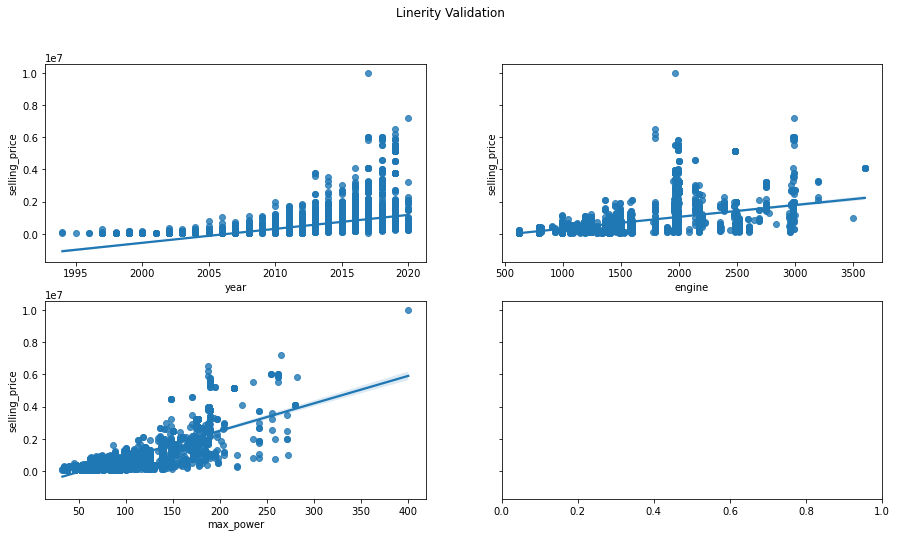

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Linerity Validation')
sns.regplot(x="year", y="selling_price", data=df,ax=axes[0,0]);
sns.regplot(x="engine", y="selling_price", data=df,ax=axes[0,1]);
sns.regplot(x="max_power", y="selling_price", data=df,ax=axes[1,0]);

#### Model Creation 

In [12]:
# Model Creation
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn import preprocessing

#### For considering the categorical value into numerical categorical values , we need to use Onehotencoding either pd.get_dummies or using One Hot Encoding using Sci-kit learn Library

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Converting type of columns to category
df['fuel']=df['fuel'].astype('category')
df['transmission']=df['transmission'].astype('category')
df['owner']=df['owner'].astype('category')


#Assigning numerical values and storing it in another columns
df['fuel_new']=df['fuel'].cat.codes
df['transmission_new']=df['transmission'].cat.codes
df['owner_new']=df['owner'].cat.codes

In [14]:
enc_data=pd.DataFrame(OneHotEncoder().fit_transform(df[['fuel_new','transmission_new','owner_new']]).toarray())
 
#Merge with main
New_df=df.join(enc_data)
 
#print(New_df)
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              7906 non-null   object  
 1   year              7906 non-null   int64   
 2   selling_price     7906 non-null   int64   
 3   km_driven         7906 non-null   int64   
 4   fuel              7906 non-null   category
 5   seller_type       7906 non-null   object  
 6   transmission      7906 non-null   category
 7   owner             7906 non-null   category
 8   mileage           7906 non-null   float64 
 9   engine            7906 non-null   float64 
 10  max_power         7906 non-null   float64 
 11  torque            7906 non-null   object  
 12  seats             7906 non-null   float64 
 13  fuel_new          7906 non-null   int8    
 14  transmission_new  7906 non-null   int8    
 15  owner_new         7906 non-null   int8    
 16  0                 7688 n

In [15]:
X= df[['year','fuel_new','transmission_new','owner_new','seats','max_power']]
y= np.array(df.selling_price).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
 
# Splitting the data into training and testing data
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
print(regr.score(X_train, y_train))

0.6630525920347142
0.6631037104326248


In [16]:
predictions = regr.predict(X_test)

In [17]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
'mean_absolute_error : ', mean_absolute_error(y_test, predictions))
print("R2 score : %.2f" % r2_score(y_test,predictions))

mean_squared_error :  202075402478.02817
mean_absolute_error :  274259.77110616467
R2 score : 0.66


In [18]:
#calculate r-squared
r2_sk = r2_score(y_test,predictions)
N=y_test.shape[0]
p=3
r2=r2_score(y_test,predictions)
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.6624120076089247
